## Homework 08 

**Type your name here**

**DSCI 35600 - Machine Learning**


## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `VotingClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [12]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Functions and classes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA

#preprocessing packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder

For this assignment, you will be using census data from 1994 to attempt to predict whether or not a person has an annual salary greater than $50,000 based on other information provided in the census. You can find a description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult).

The dataset is store in the tab-separated file `census.txt`. Load the contents of this file into a dataframe called `df`, and then display the first ten rows of the dataframe. (Reminder: I recommend AGAINST ussing the `print()` function to display a DataFrame.)


In [3]:
df = pd.read_csv('census.txt', sep ='\t')
df.head(10)


,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Part B: Preparing the Data

In the cell below, create a list called `cat_idx` that stores the indices of the columns in `df` that correspond to categorical variables. Create a list called `num_idx` that stores the indices of the columns in `df` that correspond to numerical variables. (Simply hard-code these lists.)

Then use these lists to create arrays `Xcat` and `Xnum`. Also create an array of labels called `y`. Print the shapes of these three arrays.

In [4]:
num_idx = [0,2,4,10,11,12]
cat_idx = [1,3,5,6,7,8,9,13]

Xnum = df.iloc[:,num_idx]
Xcat = df.iloc[:,cat_idx]
y = df.iloc[:,14]

print(Xnum.shape)
print(Xcat.shape)
print(y.shape)

(32561, 6)
(32561, 8)
(32561,)


#### Numerical Features
Split `Xnum` into training and validation sets called `Xnum_train` and `Xnum_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of the resulting training and validation arrays.

In [8]:
Xnum_train, Xnum_val, y_train, y_val = train_test_split(Xnum, y, test_size=0.20, random_state=1)

print('Xnum_train:', Xnum_train.shape)
print('Xnum_val:',Xnum_val.shape)
print('y_train,:', y_train.shape)
print('y_val:', y_val.shape)

Xnum_train: (26048, 6)
Xnum_val: (6513, 6)
y_train,: (26048,)
y_val: (6513,)


Use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `Xsca_train` and `Xsca_val`. Print the shape of these arrays. 

In [11]:
Scaler = StandardScaler()
Xsca_train = Scaler.fit_transform(Xnum_train)
Xsca_val = Scaler.fit_transform(Xnum_val)

print('Sca_train:\n', Xsca_train)
print('\n')
print('Xsca_val:\n', Xsca_val)

Sca_train:
 [[ 0.03136921 -0.01343642 -1.19813139 -0.14725394 -0.21799177 -0.03453362]
 [ 1.1309098  -0.80210463  1.12883806 -0.14725394 -0.21799177 -0.03453362]
 [-0.48174973 -0.31646978 -0.42247491 -0.14725394  4.49399152  0.77607435]
 ...
 [-0.84826326 -0.80732397  1.12883806 -0.14725394 -0.21799177 -0.03453362]
 [ 1.49742333  0.74283978 -0.42247491 -0.14725394 -0.21799177 -0.03453362]
 [-0.40844702 -1.23557437  1.12883806 -0.14725394  4.49399152  0.37077037]]


Xsca_val:
 [[ 1.71498194 -1.55900962 -2.37180562 -0.14081112 -0.21129763  2.05941672]
 [-1.51252771  0.1846676  -1.19493757 -0.14081112 -0.21129763 -1.24962063]
 [-0.99906027 -0.83181985  1.15879852  3.53393133 -0.21129763  0.76808508]
 ...
 [-0.26553535  0.97496741 -0.41035887 -0.14081112 -0.21129763 -0.0389972 ]
 [-0.63229781 -1.5561611  -1.19493757 -0.14081112 -0.21129763  0.36454394]
 [ 0.98145702  0.96736495  2.33566657 -0.14081112 -0.21129763  1.57516736]]


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `Xenc`. Print the shape of this array. 

In [16]:
OHE = OneHotEncoder(sparse = False)
Xenc = OHE.fit_transform(Xcat)

print('Xenc.shape:', Xenc.shape)

Xenc.shape: (32561, 102)


Split `Xenc` into training and validation sets called `Xenc_train` and `Xenc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of the resulting training and validation arrays.

In [17]:
Xenc_train, Xenc_val, y_train, y_val = train_test_split(Xenc, y, test_size=0.20, random_state=1)

print(Xenc_train.shape)
print(Xenc_val.shape)
print(y_train.shape)
print(y_val.shape)

(26048, 102)
(6513, 102)
(26048,)
(6513,)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `Xsca_train` and `Xenc_train` into an array called `X_train`. Then combine `Xsca_val` and `Xenc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [18]:
X_train = np.hstack([Xsca_train, Xenc_train])
X_val = np.hstack([Xsca_val, Xenc_val])

print(X_train.shape)
print(X_val.shape)

(26048, 108)
(6513, 108)


In [35]:
pca = PCA(n_components=15)
z_train = pca.fit_transform(X_train)
z_val = pca.fit_transform(X_val)

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.14834125 0.10859078 0.0973384  0.09645379 0.08838031 0.08150459
 0.05901761 0.02868279 0.02490735 0.02384805 0.01882877 0.01622969
 0.0157882  0.01369105 0.01238959]
[0.14834125 0.25693203 0.35427044 0.45072423 0.53910454 0.62060913
 0.67962674 0.70830954 0.73321689 0.75706494 0.77589372 0.79212341
 0.80791161 0.82160265 0.83399224]


In [36]:
print(z_train.shape)
print(z_val.shape)

(26048, 15)
(6513, 15)


# Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 20 models with `C=10**k`, where `k` ranges from -3 to 3. For each model, log the training and validation accuracies in seperate lists, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Tip: To avoid seeing warning messages, set `solver='lbfgs'` and `max_iter=1000` when creating your logistic regression models. 

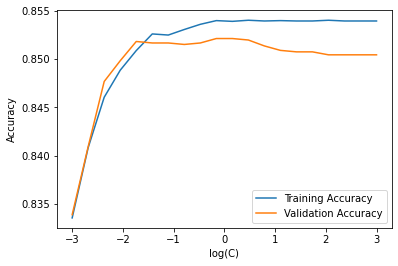

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 14.1 µs


In [37]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-3, 3, 20)

for k in exp_list:
    LR = LogisticRegression(solver='lbfgs', C=10**k, max_iter=1000)
    LR.fit(X_train, y_train)
    tr_acc.append(LR.score(X_train, y_train))
    va_acc.append(LR.score(X_val, y_val))

plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
%time

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result. 

In [39]:
idx = np.argmax(va_acc)
best_idx = exp_list[idx]
print(best_idx)

-0.1578947368421053


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [40]:
LR_model = LogisticRegression(solver='lbfgs', C=10**best_idx, max_iter=1000)

LR_model.fit(X_train, y_train)

print('Training Accuracy:', LR_model.score(X_train, y_train))
print('Training Validation:', LR_model.score(X_val, y_val))

Training Accuracy: 0.8540003071253072
Training Validation: 0.852141870105942


In [41]:
pca_model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
pca_model.fit(z_train, y_train)

print('Training Accuracy:', pca_model.score(z_train, y_train))
print('Validation Accuracy:', pca_model.score(z_val, y_val))

Training Accuracy: 0.84432585995086
Validation Accuracy: 0.8257331490864425


## Part D: K-Nearest Neighbors Model

In the cell below, create and fit several KNN models, each with a different value of `K`. In particular, consider 10 models with values of `K` ranging from 1 to 30. For each model, log the validation accuracy (but NOT the training accuracy) in a list, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Note: This could take a while to run. It took around 10 minutes on my computer. Grab a coffee.  

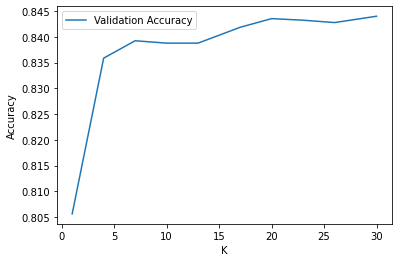

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.8 µs


In [42]:
#KNN Model
#tr_acc=[]
va_acc=[]
k_list = np.linspace(1, 30, 10).astype('int')

for k in k_list:
    KNN_model = KNeighborsClassifier(k)
    KNN_model.fit(X_train, y_train)
    va_acc.append(KNN_model.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(k_list, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

%time

Use `np.argmax` to find the value of `K` that results in the largest validation accuracy. Print this result. 

In [103]:
idx = np.argmax(va_acc)
best_k = k_list[idx]
print(best_k)

30


Create a KNN model using the previously determined value of `K`. Print the training and validation accuracies for this model, clearly indicating which is which.

In [104]:
KNN_model = KNeighborsClassifier(best_k)

KNN_model.fit(X_train, y_train)

print('Training Accuracy:', KNN_model.score(X_train, y_train))
print('Validation Accuracy:', KNN_model.score(X_val, y_val))

Training Accuracy: 0.8511210073710074
Validation Accuracy: 0.8440042990941194


## Part E: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. For each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 at the beginning of this cell.

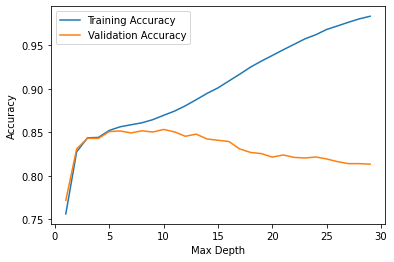

In [105]:
tr_acc = []
va_acc = []
depth_list = range(1,30)

np.random.seed(1)
for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [106]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

10


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [107]:
np.random.seed(1)
DT_model = DecisionTreeClassifier(max_depth = best_d)
DT_model.fit(X_train, y_train)

print('Training Accuracy: ', DT_model.score(X_train, y_train))
print('Validation Accuracy: ', DT_model.score(X_val, y_val))

Training Accuracy:  0.8695485257985258
Validation Accuracy:  0.8532166436358053


## Part F: Voting Classifier

Use `VotingClassifier` to create an ensemble of the three models that you previously created. Fit this ensemble model, and then print the training and validation accuracies, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [111]:
voting_clf = VotingClassifier(voting='soft', estimators = [('Logistic Regression', LR_model), ('KNN model', KNN_model),('Decision Tree model', DT_model)])

voting_clf.fit(X_train, y_train)

print('Training Accuracy:', voting_clf.score(X_train, y_train))
print('Validation Accuracy:', voting_clf.score(X_val, y_val))

Training Accuracy: 0.8683584152334153
Validation Accuracy: 0.857976354982343


## Part G: Summary

Print the validation accuracies for each of the four models, clearly indicating which is which. 

In [109]:
print('Logistic Regression:', LR_model.score(X_val, y_val))
print('KNN Classifier:', KNN_model.score(X_val, y_val))
print('Decision Tree:', DT_model.score(X_val, y_val))
print('Ensemble Accuracy:', voting_clf.score(X_val, y_val))

Logistic Regression: 0.8522954091816367
KNN Classifier: 0.8440042990941194
Decision Tree: 0.8532166436358053
Ensemble Accuracy: 0.8567480423767849
